In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sweetviz as svz
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso

In [61]:
data = pd.read_csv("Car.csv")

In [62]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [64]:
data.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [65]:
data.duplicated().sum()

763

In [66]:
data.drop_duplicates(inplace=True)

In [67]:
data.shape

(3577, 8)

In [68]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

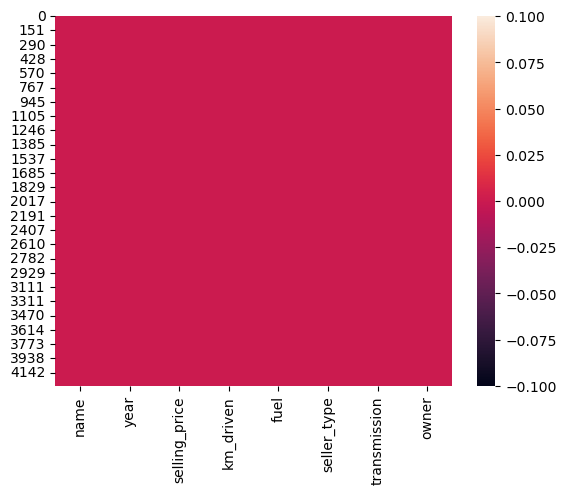

In [69]:
sn.heatmap(data.isnull())
plt.show()

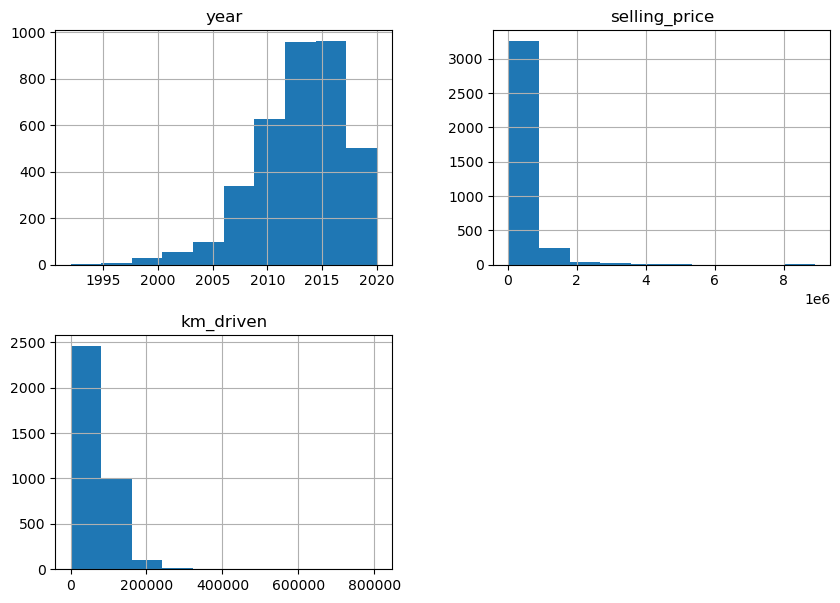

In [70]:
#data visualizarion 
data.hist(figsize=(10,7))
plt.show()

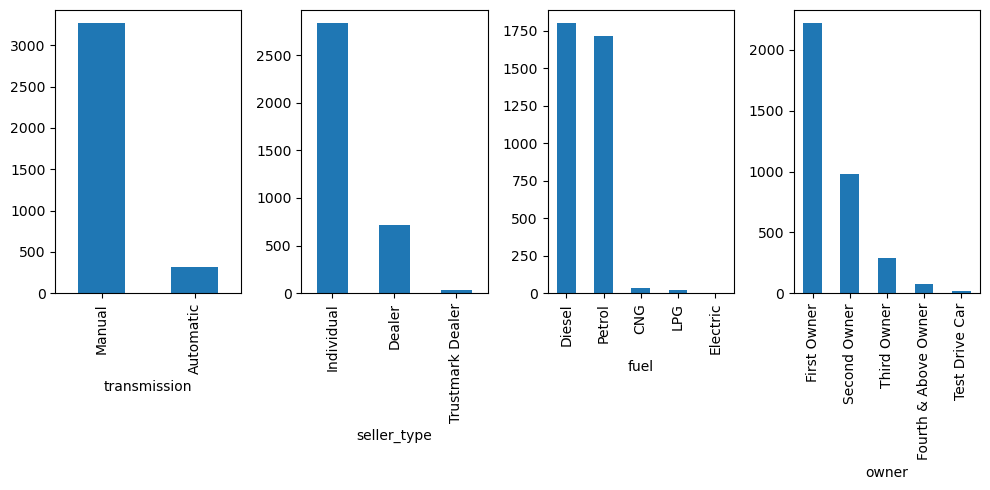

In [71]:
fig,axes= plt.subplots(1,4,figsize=(10,5))
data["transmission"].value_counts().plot(kind="bar" ,ax= axes[0])
data["seller_type"].value_counts().plot(kind="bar",ax=axes[1])
data["fuel"].value_counts().plot(kind="bar",ax=axes[2])
data["owner"].value_counts().plot(kind="bar",ax=axes[3])
plt.tight_layout()
plt.show()


In [74]:
#convert text to numeric
labelE = LabelEncoder()
colName = data.select_dtypes(include="object").columns
for i in colName:
    data[i]= labelE.fit_transform(data[i])

In [107]:
X = data.drop(columns="selling_price",axis=1)
Y = data["selling_price"].values.reshape(-1, 1)

In [125]:
XTR,XTS,YTR,YTS =train_test_split(X,Y,test_size=0.2,random_state=2)

In [126]:
modelR = LinearRegression()

In [127]:
modelR.fit(XTR,YTR)

LinearRegression()

In [128]:
PR = modelR.predict(XTR)

In [129]:
modelR.score(XTR,YTR)*100

44.15625572511842

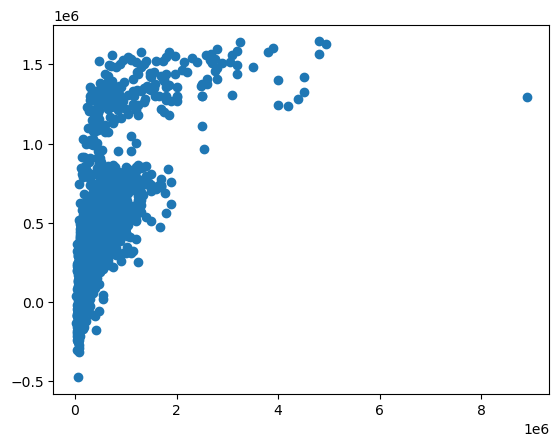

In [130]:
plt.scatter(YTR,PR)

In [131]:
LassoModel = Lasso()

In [132]:
LassoModel.fit(XTR,YTR)

Lasso()

In [117]:
LM = LassoModel.predict(XTR)

In [118]:
LassoModel.score(XTR,YTR)

0.4415625571792785

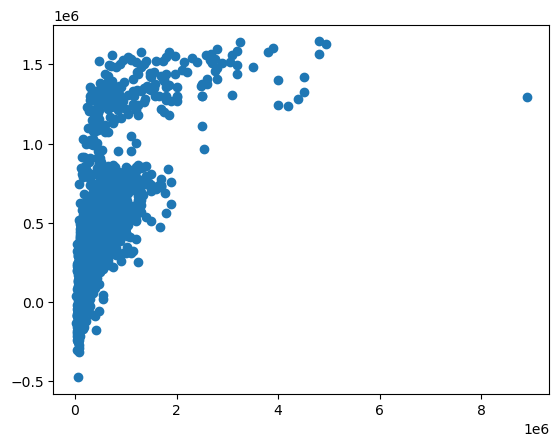

In [119]:
plt.scatter(YTR,LM)